In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())

In [10]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [8]:
# descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# split the data into dependent and independent variables
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [12]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x_train_sc=sc.fit_transform(x_train)

x_test_sc=sc.transform(x_test)

In [15]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression() # build the model

lr.fit(x_train_sc,y_train) # train the model

y_pred=lr.predict(x_test_sc) # predict the model

In [16]:
y_proba=lr.predict_proba(x_test_sc)
y_proba

array([[0.03505922, 0.96494078],
       [0.84678832, 0.15321168],
       [0.91329556, 0.08670444],
       [0.33896998, 0.66103002],
       [0.88855034, 0.11144966],
       [0.96833054, 0.03166946],
       [0.24399089, 0.75600911],
       [0.13289782, 0.86710218],
       [0.59807894, 0.40192106],
       [0.64060854, 0.35939146],
       [0.41347103, 0.58652897],
       [0.02837582, 0.97162418],
       [0.73771963, 0.26228037],
       [0.83574109, 0.16425891],
       [0.90464487, 0.09535513],
       [0.86235248, 0.13764752],
       [0.12854262, 0.87145738],
       [0.97855809, 0.02144191],
       [0.63171815, 0.36828185],
       [0.75275564, 0.24724436],
       [0.34836093, 0.65163907],
       [0.5517156 , 0.4482844 ],
       [0.9200956 , 0.0799044 ],
       [0.95385445, 0.04614555],
       [0.95390632, 0.04609368],
       [0.65724974, 0.34275026],
       [0.96394679, 0.03605321],
       [0.08318847, 0.91681153],
       [0.9067464 , 0.0932536 ],
       [0.86902446, 0.13097554],
       [0.

In [19]:
pd.DataFrame({'pred_prob_non_diab': y_proba[:,0], 'pred_prob_diab': y_proba[:,1], 'true': y_test, 'predicted':y_pred})

,pred_prob_non_diab,pred_prob_diab,true,predicted
661,0.035059,0.964941,1,1
122,0.846788,0.153212,0,0
113,0.913296,0.086704,0,0
14,0.338970,0.661030,1,1
529,0.888550,0.111450,0,0
...,...,...,...,...
366,0.757839,0.242161,1,0
301,0.566432,0.433568,1,0
382,0.871331,0.128669,0,0
140,0.831573,0.168427,0,0


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

0.796875

In [22]:
# ACCURACY_SCORE
accuracy_score(y_test,y_pred)

0.796875

In [26]:
# CONFUSION_MATRIX
mat=confusion_matrix(y_test,y_pred)

<Axes: >

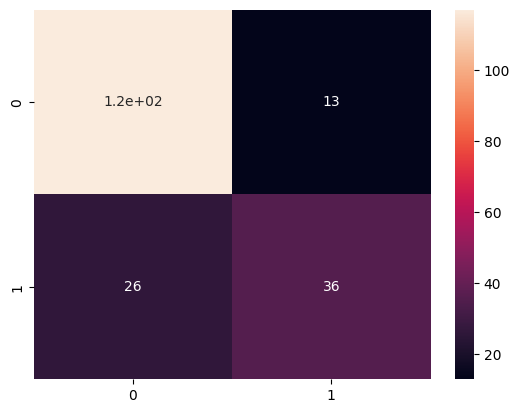

In [27]:
sns.heatmap(mat,annot=True)

In [28]:
y_test.value_counts()

,count
Outcome,
0,130
1,62


In [31]:
# precision

precision_score(y_test,y_pred)


0.7346938775510204

In [33]:
recall_score(y_test,y_pred)

0.5806451612903226

In [ ]:
f1_score(y_test,y_pred)